# How does Loss Function work

Author: YinTaiChen

In [1]:
import torch
import torch.nn as nn
from torch.nn import Module
from torch.autograd import Variable
import torch.optim as optim

以下三個 Variable 將參與 y = w * x + b 這個運算

注意 x 的 requires_grad 設為 False

In [2]:
x = Variable(torch.Tensor([1]), requires_grad=False)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

希望運算的結果接近10這個數字

In [3]:
target = Variable(torch.Tensor([10]))

我們想調整的參數為w與b

In [4]:
parameters = [w, b]

定義一個loss function, MSE代表mean square error

In [5]:
criterion = nn.MSELoss()

建立一個會幫我們調整參數的optimizer

In [6]:
optimizer = optim.SGD(parameters, lr=0.1)

讓w與b的值不斷改變(訓練10次),直到輸出的值(y)非常接近target,也就是10

In [7]:
output = []
weight = []
bias = []

for epoch in range(10):
    optimizer.zero_grad()
    y = w * x + b
    loss = criterion(y, target)
    loss.backward()
    optimizer.step()
    
    output.append(y.data[0])
    weight.append(w.data[0])
    bias.append(b.data[0])

## 將過程視覺化

In [8]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [9]:
font = {'family' : 'sans-serif',
 'weight' : 'bold',
 'size' : 20}
matplotlib.rc('font', **font)

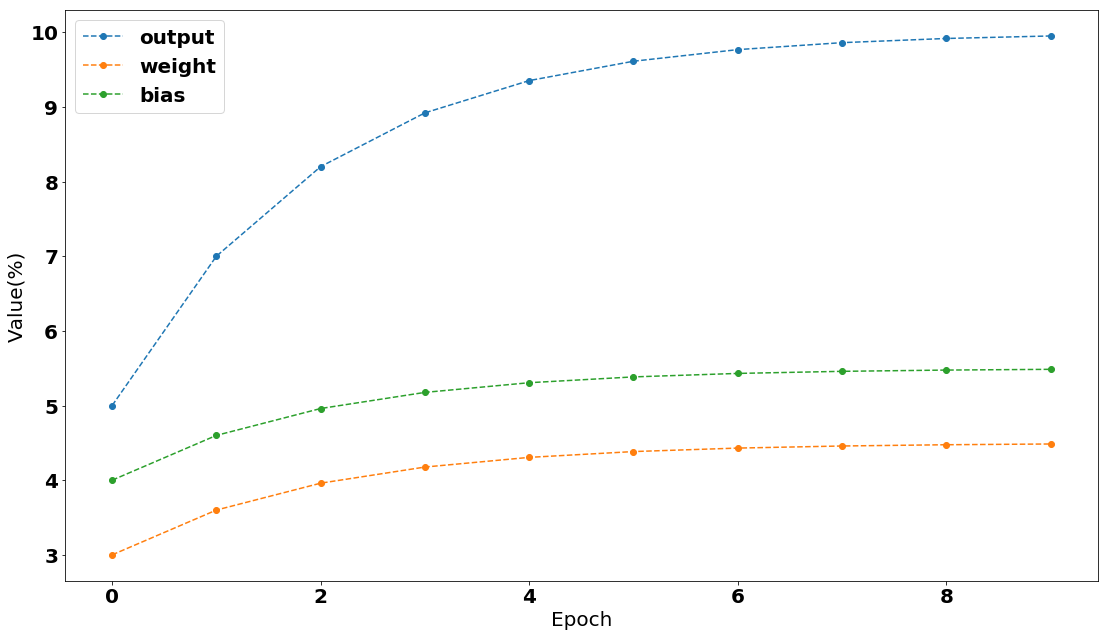

In [10]:
axes = plt.gca()
axes.set_xlabel('Epoch')
axes.set_ylabel('Value(%)')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

x_axis = [i for i in range(len(output))]

plt.plot(x_axis, output, '--o', label="output")
plt.plot(x_axis, weight, '--o', label="weight")
plt.plot(x_axis, bias, '--o', label="bias")
plt.legend(loc="upper left")

## 檢查w, b, x是否有改變

In [11]:
print(w)

Variable containing:
 4.4849
[torch.FloatTensor of size 1]



In [12]:
print(b)

Variable containing:
 5.4849
[torch.FloatTensor of size 1]



In [13]:
print(x)

Variable containing:
 1
[torch.FloatTensor of size 1]



## 訓練後的結果好嗎？

In [14]:
w * x + b

Variable containing:
 9.9698
[torch.FloatTensor of size 1]

很好！非常接近10